<a href="https://colab.research.google.com/github/hariszaf/metabolic_toy_model/blob/main/Antony2025/preparingYourEnvironment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metabolic Models Applied to Microbiomes**

## **Preparing for the workshop**

The workshop content is accessible through the browser. Consists of a series of [Jupyter Notebooks](https://www.dataquest.io/blog/jupyter-notebook-tutorial/):




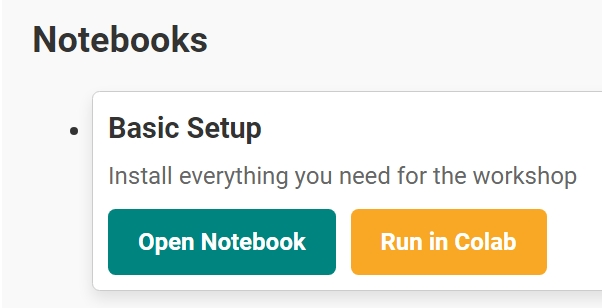


1) **Open Notebook** to view the content as a static html page.


\\

2) **Run in Colab** opens a google colab interface. There you can execute the code directly on the browser, provided you have a Google account.

You can also copy and run the code locally in your laptop.





### **Creating a Conda environment**

Here, I assume you have Miniconda or Anaconda installed in your machine. If you don't, follow [this tutorial](https://eduand-alvarez.medium.com/setting-up-anaconda-on-your-windows-pc-6e39800c1afb
).

\\


1) First create a Conda environment called **gsmmWorkshop**:

```bash
conda create -n gsmmWorkshop python=3.11.11
```

select **y**

2) Activate your environment

```bash
conda activate gsmmWorkshop

```

### **Installing Gurobi**

A **Genome-scale metabolic model** is essentially a set of linear inequalities, which require [linear programming](https://gatiaher.github.io/projects/intuition-for-linear-programming/) to **solve**.


[Guroby](https://www.gurobi.com/) is a linear solver that is free for academic usage.


You can generate a free academic license by following the steps in the [**Academic**](https://www.gurobi.com/academia/academic-program-and-licenses/) tab while connected to the internet of an academic institution.

Here we are sharing a license that will be deactivated a few days after the workshop. 
Make sure to obtain your own license to be a able to work with the course content in the long term.


#### **Create a script that generates a local gurobi license**


later, replace the `WLSACCESSID`, `WLSSECRET`, and `LICENSEID` fields with your own license:


```python
import os
# Create directory for the license
os.makedirs("content/licenses", exist_ok=True)

def create_gurobi_license():
    license_content = (
        "# Gurobi WLS license file\n"
        "# Your credentials are private and should not be shared or copied to public repositories.\n"
        "# Visit https://license.gurobi.com/manager/doc/overview for more information.\n"
        "WLSACCESSID=1fedf73b-9471-4da8-bdc7-2aaacf2e30f3\n"
        "WLSSECRET=3bc7d209-a4ec-4195-98be-4b254f181512\n"
        "LICENSEID=940603"
    )
    with open("content/licenses/gurobi.lic", "w") as f:
        f.write(license_content)
    print("License file created at content/licenses/gurobi.lic")

if __name__ == "__main__":
    create_gurobi_license()

```
save the script as `create_gurobi_license.py`

run the script:

```bash
python create_gurobi_license.py

```



#### **Install Gurobipy and make sure it works**





<span style="color:red;">Don't use **conda** install.</span>


```bash
pip install gurobipy
```

Create the test script `test_guroby.py`:

```python
#set up the gurobi license
import os
os.environ['GRB_LICENSE_FILE'] = 'content/licenses/gurobi.lic'

import gurobipy
from gurobipy import Model
model = Model("test")
print("Gurobi is working!", "\U0001F600")

```
run the script

```bash
python test_gurobi.py
```

You should see:

```bash

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 940603
Academic license 940603 - for non-commercial use only - registered to da___@gmail.com
Gurobi is working! 😀
```

\\


### **Let's replicate these steps in the Notebook**


Function to create a WSL Gurobi license.

In [1]:
def create_gurobi_license():
    license_content = (
        "# Gurobi WLS license file\n"
        "# Your credentials are private and should not be shared or copied to public repositories.\n"
        "# Visit https://license.gurobi.com/manager/doc/overview for more information.\n"
        "WLSACCESSID=1fedf73b-9471-4da8-bdc7-2aaacf2e30f3\n"
        "WLSSECRET=3bc7d209-a4ec-4195-98be-4b254f181512\n"
        "LICENSEID=940603"
    )
    with open("/content/licenses/gurobi.lic", "w") as f:
        f.write(license_content)
    print("License file created at /content/licenses/gurobi.lic")



Run the function and add the license to our path.

In [2]:
import os

# Create directory for the license
os.makedirs("/content/licenses", exist_ok=True)

# Generate the license file
create_gurobi_license()

#add to path
os.environ['GRB_LICENSE_FILE'] = '/content/licenses/gurobi.lic'


License file created at /content/licenses/gurobi.lic


Install Gurobipy

In [3]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 53.8 MB/s eta 0:00:00


Make sure it works.

In [4]:
import gurobipy
from gurobipy import Model
model = Model("test")
print("Gurobi is working!", "\U0001F600")

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 940603
Academic license 940603 - for non-commercial use only - registered to da___@gmail.com
Gurobi is working! 😀


## **Install COBRApy and make sure it works**



[**COBRApy**](https://opencobra.github.io/cobrapy/) will be our main interface with metabolic models (also called **constraint based models**). We will use it heavily in the Workshop when working with metabolic models and **Python**.

<span style="color:red;">Again, don't use **conda** install.</span>

```bash
pip install cobra
```

write the script `test_cobra.py` and run it.


```python
import os
#set the gurobi license
os.environ['GRB_LICENSE_FILE'] = 'content/licenses/gurobi.lic'

import cobra
from cobra.io import load_model

model = load_model("textbook")

solution = model.optimize()

print(f"flux balance analysis solution is {solution.objective_value}")

print("COBRApy is working", "\U0001F600")

```


```bash
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 940603
Academic license 940603 - for non-commercial use only - registered to da___@gmail.com
flux balance analysis solution is 0.8739215069684301
COBRApy is working 😀
Warning: environment still referenced so free is deferred (Continue to use WLS)
```

### **Replicate in the Notebook**



### Install **COBRApy**

In [5]:
#install COBRApy
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 34.3 MB/s eta 0:00:00


#### **Run the test_cobra script**


The environment variables set above are preserverd in the Notebook.

In [6]:
import cobra
from cobra.io import load_model

model = load_model("textbook")

solution = model.optimize()

print(f"flux balance analysis solution is {solution.objective_value}")

print("COBRApy is working", "\U0001F600")

flux balance analysis solution is 0.8739215069684305
COBRApy is working 😀


Make sure the solver being used is **Gurobi**

In [7]:
model.solver

### **Install DNNGIOR and make sure it works**

[DNNGIOR](https://www.cell.com/iscience/fulltext/S2589-0042(24)02574-4?uuid=uuid%3A5aee8e08-a32d-474f-a439-50399333f7d4) will be used to gapfill our models.

Due to some current incompatabilities in the package requirements the `pip install` is broken.

For now:



1) Clone the Github repo:

```bash
git clone https://github.com/MGXlab/DNNGIOR.git
```

2) cd into the repo

```bash
cd DNNGIOR
```

3) install the package with a broken dependency

```bash
pip install python-libsbml==5.20.0
```
4) install DNNGIOR without dependencies

```bash
pip install . --no-deps
```

5) install the other dependencies

```bash
pip install -r <(pip show dnngior | grep Requires | cut -d ' ' -f2- | tr ', ' '\n' | grep -v 'python-libsbml')
```

### **Test DNNGIOR**

Write the script `test_dnngior.py` and run it. There will be an oportunity to understand what the script is doing during the workshop. For now, just copy, paste, save, and run.

```python
import os, sys
# set the gurobi license
os.environ['GRB_LICENSE_FILE'] = 'content/licenses/gurobi.lic'

import cobra

import dnngior

# set to the location of the DNNGIOR repository
models_path = "DNNGIOR/docs/models"
path_to_blautia_model = os.path.join(models_path, "bh_ungapfilled_model.sbml")

draft_reconstruction = cobra.io.read_sbml_model(path_to_blautia_model)

print(f"The solution of the draft reconstruction is:\n\n{draft_reconstruction.optimize()}",  "\U0001F63F", "\n")

gapfill = dnngior.Gapfill(draftModel = path_to_blautia_model,
                                          medium = None,
                                          objectiveName = 'bio1')

print("Number of reactions added:", len(gapfill.added_reactions))
print("~~")
for reaction in gapfill.added_reactions:
    print(f"Name: {gapfill.gapfilledModel.reactions.get_by_id(reaction).name}", "\n", f"Equation: {gapfill.gapfilledModel.reactions.get_by_id(reaction).build_reaction_string(use_metabolite_names=True)}")


gf_model = gapfill.gapfilledModel.copy()

print(f"The solution of the gapfilled reconstruction is:\n\n{gf_model.optimize()}",  "\U0001F63A", "\n")
```

In the long output it prints look for:

The solution of the gapfilled reconstruction is:

<Solution 154.228 at 0x189db678b10> 😺

DNNGIOR is working and you just gapfilled a model.

# **Replicate in the Notebook**

### **clone the repo**

In [8]:
!git clone https://github.com/MGXlab/DNNGIOR.git
%cd DNNGIOR

Cloning into 'DNNGIOR'...
remote: Enumerating objects: 1309, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 1309 (delta 136), reused 138 (delta 127), pack-reused 1142 (from 1)
Receiving objects: 100% (1309/1309), 200.64 MiB | 20.87 MiB/s, done.
Resolving deltas: 100% (658/658), done.
Updating files: 100% (160/160), done.
/content/DNNGIOR


### **Account for the broken dependecy** ☹

In [9]:
#!pip install python-libsbml==5.20.0
!pip install . --no-deps
!pip install -r <(pip show dnngior | grep Requires | cut -d ' ' -f2- | tr ', ' '\n' | grep -v 'python-libsbml')

Processing /content/DNNGIOR
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dnngior: filename=dnngior-0.0.3-py3-none-any.whl size=27949553 sha256=41f829bcc1bf5aedee948fe05df021302107dd7b53d9815b529275707ef93099
  Stored in directory: /tmp/pip-ephem-wheel-cache-7sm75gl9/wheels/4a/fb/28/9ccbe43ae97882b9c9d8cdeffe5de301711d9b7e8afa735490
Successfully built dnngior


### **Test it**

In [10]:
import dnngior
models_path = "/content/DNNGIOR/docs/models"
path_to_blautia_model = os.path.join(models_path, "bh_ungapfilled_model.sbml")

draft_reconstruction = cobra.io.read_sbml_model(path_to_blautia_model)

print(f"The solution of the draft reconstruction is:\n\n{draft_reconstruction.optimize()}",  "\U0001F63F", "\n")

gapfill = dnngior.Gapfill(draftModel = path_to_blautia_model,
                                          medium = None,
                                          objectiveName = 'bio1')

print("Number of reactions added:", len(gapfill.added_reactions))
print("~~")
for reaction in gapfill.added_reactions:
    print(f"Name: {gapfill.gapfilledModel.reactions.get_by_id(reaction).name}", "\n", f"Equation: {gapfill.gapfilledModel.reactions.get_by_id(reaction).build_reaction_string(use_metabolite_names=True)}")


gf_model = gapfill.gapfilledModel.copy()

print(f"The solution of the gapfilled reconstruction is:\n\n{gf_model.optimize()}",  "\U0001F63A", "\n")

ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


The solution of the draft reconstruction is:

<Solution 0.000 at 0x78767f173cd0> 😿 



ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.
ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.
ERROR:cobra.io.sbml:No objective coefficients in model. Unclear what should be optimized


Streaming output truncated to the last 5000 lines.
>> reaction:  rxn48539_c0
>> reaction:  rxn48539_c0_rv
>> reaction:  rxn48540_c0
>> reaction:  rxn48540_c0_rv
>> reaction:  rxn48541_c0
>> reaction:  rxn48541_c0_rv
>> reaction:  rxn48542_c0
>> reaction:  rxn48542_c0_rv
>> reaction:  rxn48543_c0
>> reaction:  rxn48543_c0_rv
>> reaction:  rxn48544_c0
>> reaction:  rxn48544_c0_rv
>> reaction:  rxn48545_c0
>> reaction:  rxn48545_c0_rv
>> reaction:  rxn48546_c0
>> reaction:  rxn48546_c0_rv
>> reaction:  rxn48547_c0
>> reaction:  rxn48547_c0_rv
>> reaction:  rxn48548_c0
>> reaction:  rxn48548_c0_rv
>> reaction:  rxn48549_c0
>> reaction:  rxn48549_c0_rv
>> reaction:  rxn48550_c0
>> reaction:  rxn48550_c0_rv
>> reaction:  rxn48551_c0
>> reaction:  rxn48551_c0_rv
>> reaction:  rxn48552_c0
>> reaction:  rxn48552_c0_rv
>> reaction:  rxn48553_c0
>> reaction:  rxn48553_c0_rv
>> reaction:  rxn48554_c0
>> reaction:  rxn48554_c0_rv
>> reaction:  rxn48555_c0
>> reaction:  rxn48555_c0_rv
>> reaction:  

**Congratulations! You are all set for the workshop**